<a href="https://colab.research.google.com/github/trinalvf/final_year_project/blob/main/MachineLearning/LearningCurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

**K-Nearest Neighbour**

In [ ]:
flow_dataset = pd.read_csv('/content/drive/MyDrive/dataset.csv')

flow_dataset = flow_dataset.drop(columns=['flow_id','timestamp','flags','hard_timeout','idle_timeout'])


flow_dataset1 = flow_dataset.iloc[:5000,:]
flow_dataset2 = flow_dataset.iloc[125640:130640,:]
flow_dataset = pd.concat([flow_dataset1, flow_dataset2], ignore_index=True)

flow_dataset.iloc[:, 1] = flow_dataset.iloc[:, 1].str.replace('.', '')
flow_dataset.iloc[:, 3] = flow_dataset.iloc[:, 3].str.replace('.', '')
#flow_dataset.iloc[:, 4] = flow_dataset.iloc[:, 4].str.replace('.', '')

X_flow = flow_dataset.iloc[:, :-1].values
X_flow = X_flow.astype('float64')

y_flow = flow_dataset.iloc[:, -1].values

X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.25, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
flow_model = classifier.fit(X_flow_train, y_flow_train)

y_flow_pred = flow_model.predict(X_flow_test)


print("Confusion Matrix")
cm = confusion_matrix(y_flow_test, y_flow_pred)
print(cm)

acc = accuracy_score(y_flow_test, y_flow_pred)

print("Success Accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("Fail Accuracy = {0:.2f} %".format(fail*100))

Confusion Matrix
[[1263    0]
 [  24 1213]]
Success Accuracy = 99.04 %
Fail Accuracy = 0.96 %


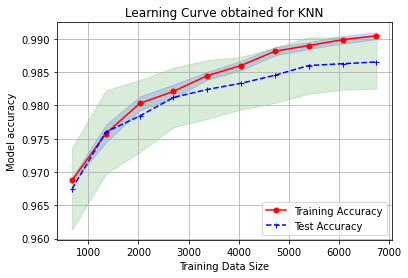

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=classifier, X=X_flow_train, y=y_flow_train,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve obtained for KNN')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

**Decision Tree**

In [ ]:
dtclassifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
flow_model = dtclassifier.fit(X_flow_train, y_flow_train)

y_flow_pred = flow_model.predict(X_flow_test)

print("Confusion Matrix")
cm = confusion_matrix(y_flow_test, y_flow_pred)
print(cm)

acc = accuracy_score(y_flow_test, y_flow_pred)

print("Success Accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("Fail Accuracy = {0:.2f} %".format(fail*100))

Confusion Matrix
[[1263    0]
 [   0 1237]]
Success Accuracy = 100.00 %
Fail Accuracy = 0.00 %


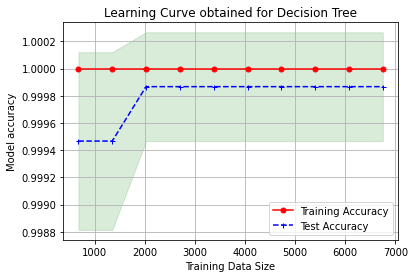

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=dtclassifier, X=X_flow_train, y=y_flow_train,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve obtained for Decision Tree')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

**Random Forrest**

In [ ]:
rfclassifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
flow_model = rfclassifier.fit(X_flow_train, y_flow_train)

y_flow_pred = flow_model.predict(X_flow_test)

print("Confusion Matrix")
cm = confusion_matrix(y_flow_test, y_flow_pred)
print(cm)

acc = accuracy_score(y_flow_test, y_flow_pred)

print("Success Accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("Fail Accuracy = {0:.2f} %".format(fail*100))

Confusion Matrix
[[1263    0]
 [   0 1237]]
Success Accuracy = 100.00 %
Fail Accuracy = 0.00 %


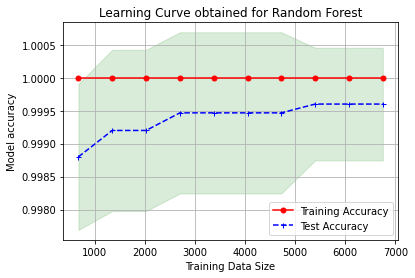

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=rfclassifier, X=X_flow_train, y=y_flow_train,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve obtained for Random Forest')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

**Support Vector Machine**

In [ ]:
svmclassifier = SVC(kernel='rbf', random_state=0)
flow_model = svmclassifier.fit(X_flow_train, y_flow_train)

y_flow_pred = flow_model.predict(X_flow_test)

print("Confusion Matrix")
cm = confusion_matrix(y_flow_test, y_flow_pred)
print(cm)

acc = accuracy_score(y_flow_test, y_flow_pred)

print("Success Accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("Fail Accuracy = {0:.2f} %".format(fail*100))

Confusion Matrix
[[1263    0]
 [ 351  886]]
Success Accuracy = 85.96 %
Fail Accuracy = 14.04 %


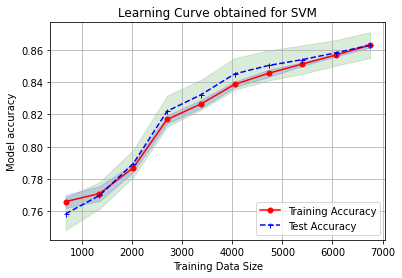

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svmclassifier, X=X_flow_train, y=y_flow_train,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve obtained for SVM')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

**Naive-Bayes**

In [ ]:
nbclassifier = GaussianNB()
flow_model = svmclassifier.fit(X_flow_train, y_flow_train)

y_flow_pred = flow_model.predict(X_flow_test)

print("Confusion Matrix")
cm = confusion_matrix(y_flow_test, y_flow_pred)
print(cm)

acc = accuracy_score(y_flow_test, y_flow_pred)

print("Success Accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("Fail Accuracy = {0:.2f} %".format(fail*100))

Confusion Matrix
[[1263    0]
 [ 351  886]]
Success Accuracy = 85.96 %
Fail Accuracy = 14.04 %


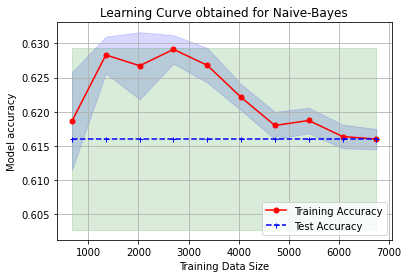

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=nbclassifier, X=X_flow_train, y=y_flow_train,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve obtained for Naive-Bayes')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

**Logistic Regression**

In [ ]:
lrclassifier = LogisticRegression(solver='liblinear', random_state=0)
flow_model = lrclassifier.fit(X_flow_train, y_flow_train)

y_flow_pred = flow_model.predict(X_flow_test)

print("Confusion Matrix")
cm = confusion_matrix(y_flow_test, y_flow_pred)
print(cm)

acc = accuracy_score(y_flow_test, y_flow_pred)

print("Success Accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("Fail Accuracy = {0:.2f} %".format(fail*100))

Confusion Matrix
[[1263    0]
 [  11 1226]]
Success Accuracy = 99.56 %
Fail Accuracy = 0.44 %


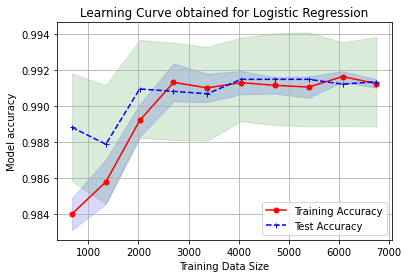

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=lrclassifier, X=X_flow_train, y=y_flow_train,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='blue', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve obtained for Logistic Regression')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
